# Modelo de regressão linear simples

Vamos implementar um modelo de regressão linear simples em python

## Modelo
$$ \begin{equation}
\tag{1}
Y = β_0 + β1X + ε
\end{equation}$$

β0 : intercepto

β1 : coeficiente angular

X: v. independente, preditora, regressora, explanatória, covariável, feature

Y: dependente, resposta

ε : variável aleatória da diferença entre o valor observado de y e a reta $(β_0 + β1X)$, erro estatístico

Como a equação dada envolve apenas uma variavel regressora, é chamada de **regressão linear simples**

## Notação
$$\overline{X} = \frac{\sum_{i=1}^n X_i}{n}; \overline{Y} = \frac{\sum_{i=1}^n Y_i}{n}$$
$$S_{XX} = \sum_{i=1}^n (X_i - \overline X)^2 = \sum_{i=1}^n X_i^2 - n\overline{X}^2$$
$$S_{YY} = \sum_{i=1}^n (Y_i - \overline Y)^2 = \sum_{i=1}^n Y_i^2 - n\overline{Y}^2$$
$$S_{XY} = \sum_{i=1}^n (X_i - \overline X) (Y_i - \overline Y) = \sum_{i=1}^n (X_i Y_i) - n \overline{XY} = \sum_{i=1}^n (X_i - \overline X) Y_i$$

O metodo dos mínimos quadrados consiste em minimizar a soma dos quadrados dos resíduos:

Derivando com relação a $β_0$ e $β_1$  e igualando a zero encontramos o ponto de minimo:
$$\hat{β_1} = \frac{S_{XY}}{S_{XX}}$$
$$\hat{β_0} = \overline Y − \hat β_1X$$

## Implementando em python

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [23]:
def least_squares2(X,Y):
    '''
    X: Vetor com valores de x
    Y: Vetor com valores de y
    Retorna os coeficientes m e b da equação
    '''
        
    #Valores para facilitar
    x_a = sum(X)/len(X)
    y_a = sum(Y)/len(Y)
    x2_a = sum(np.power(X,2))/len(X)
    xy_a = np.dot(X,Y)/len(X)
    
    #coeficiente angular (m) e variavel idenpendente b : y = mx + b
    m = (xy_a - x_a * y_a)/(x2_a - x_a**2)
    
    b = (x2_a * y_a - x_a * xy_a)/(x2_a - x_a**2)
    
    #vetor com predição de y nos pontos do vetor x
    X = np.array(X)
    y_pred = X*m + b
    
    #plotando o grafico
    plt.scatter(X, Y) #plotando pontos 
    plt.plot(X, y_pred, color='red')
    plt.show()

    return m,b

## Conjunto de pontos para a regressão

In [24]:
x = np.array([58,105,88,118,117,137,157,169,149,202])
y = np.array([2,6,8,8,12,16,20,20,22,26])

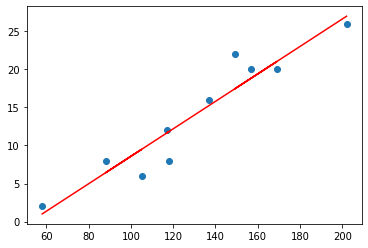

Coeficiente m:0.18054672600127145
Coeficient b:-9.47107438016529


In [33]:
m,b = least_squares2(x,y)
print('Coeficiente m:{}'.format(m))
print('Coeficient b:{}'.format(b))

## Utilizando a biblioteca do sklearn

In [35]:
reg = LinearRegression().fit(x.reshape(-1,1),y)
print('Coeficiente m:{}'.format(reg.coef_[0]))
print('Coeficient b:{}'.format(reg.intercept_))

Coeficiente m:0.1805467260012714
Coeficient b:-9.47107438016528
